# Countdown Game

This project seeks to analyze and solve the number round of TV programme Countdown. 

## How to Play

- Contestants are given six random integer numbers with range 1 - 100 (inclusive). 
- A random target integer number between 101 and 999 is generated. 
- Contestants are expected to use a combination of the six integer numbers using plus, minus, divide and multiply operators to result in the generated random target number. 

## Rules

- Each number can only be used once.
- Division operation can only be used when the divisor perfectly divides the dividend (i.e. quotient is an integer).
- Subtraction operation can only be used when the result is a positive integer.

## Imports

In [24]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import math
import reprlib # for limiting output of large lists
from time import time


# Strategy

For the purpose of solving the problem, a brute force approach will be used to get to the root of the problem and understand the complexity and thereafter, some optimization techniques will be employed to optimize the solution. 


# Solution

## Problem Analysis

Let $n$ = number of input numbers, i.e. $n = 6$

Let $m$ = number of possible operators, i.e. $m = 4$

Let $X$ = list of numbers to operate on, i.e.  $ X = [x_1, x_2, x_3, x_4, x_5]$


Let $O$ = set of possible operators, i.e. $O = \{+, -, /, *\}$





### Assumptions

The solution could be a combination of $r$ numbers where $0 \leq r \leq n$.


Let $N$ be the total number of evaluations required to brute force a solution. And $N_r$ is the sum of evaluation required to brute force a solution with $r$ combination of numbers. 

$N = \sum\limits_{r=1}^{n}N_r$ 

### Assertion


The following assertions were made and will be demonstrated in this workbook. 

- $N = y_1 \cdot y_2 \cdot y_3 \cdot y_4 \quad$ where $y_1 = {}^nC_r = \frac{n!}{(n-r)! \cdot r!},\quad$ $y_2 = r!,\quad$ $y_3 = m^{r-1},\quad y_4 = 2^{r-1}$

    $N_r = \frac{n!}{(n-r)! \times r!} \times r! \times m^{r-1} \times 2^{r-1}$

    $N_r = \frac{n!}{(n-r)!} \times (2m)^{r-1}$


- $N_r = {}^nC_r \times r! \times m^{r-1} \times 2^{r-1}$

Where $n$ is number of input numbers, $r$ is number of samples under consideration (1, 2, 3, 4, 5, and 6), $m$ is number of operators = 4 ($+, -, \times, \div$) and ${}^nC_r = \frac{n!}{(n-r)! \times r!}
$

 - $   \text{Total Evaluations N}=\sum\limits_{r=1}^n y_1 \times y_2 \times y_3 \times y_4
    =\sum\limits_{r=1}^{n}{}^nC_r \times r! \times m^{r-1} \times 2^{r-1} \\
    =\sum\limits_{r=1}^{n}\frac{n!}{(n-r)!} \times m^{r-1} \times 2^{r-1} \\
    =\sum\limits_{r=1}^{n}\frac{n!}{(n-r)!} \times 2^{3(r-1)}\qquad (\text{since }m\equiv4 = 2^2)\\
    =\sum\limits_{r=1}^{n}\frac{n! \cdot 8^{r-1} }{(n-r)!} 
$

## Computational Complexity of Algorithm

In [5]:
# define the algorithm complexity function
n = 6
r = np.arange(1, n + 1)
def algorithm(rI : int, n : int) -> int:
    count = math.factorial(n) * 8 ** (rI - 1) / (math.factorial(n - rI))
    return count

y = list(algorithm(ri, n) for ri in r)

### Plot Algorithm against factorial and exponent functions

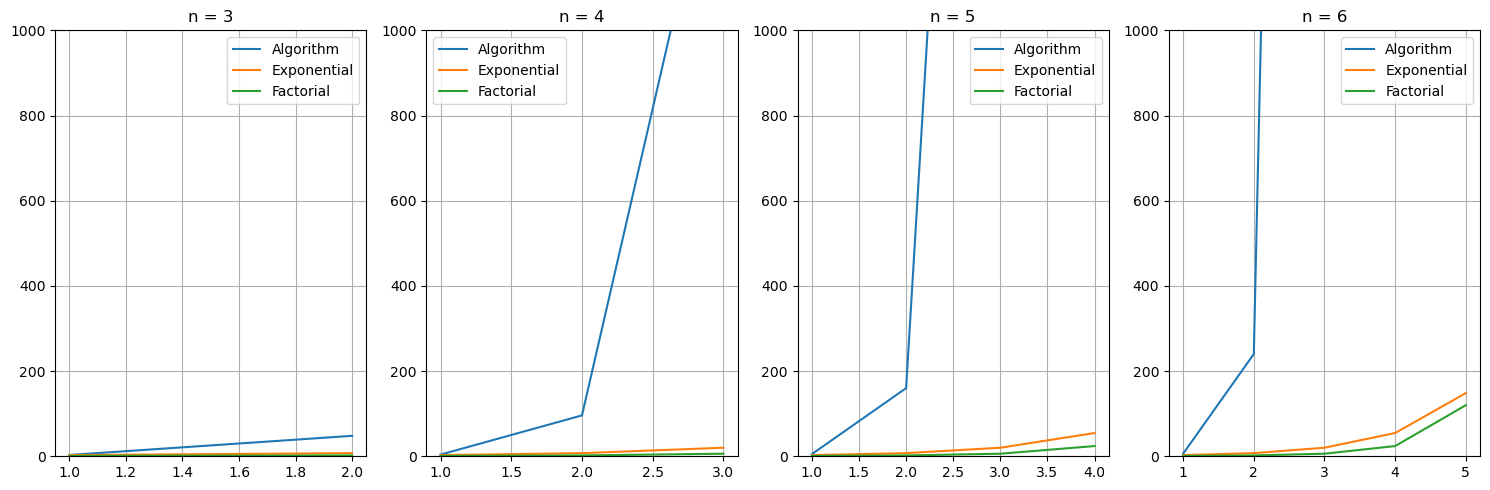

In [6]:
# plot with varying input to aid interpretation
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, ax in enumerate(axs.flat):
    r = np.arange(1, i + 3)
    y = list(algorithm(ri, i + 3) for ri in r)
    # scale of plot

    ax.set_ylim([0, 1000])

    ax.plot(r, y, label='Algorithm')
    ax.plot(r, np.exp(r), label='Exponential')
    ax.plot(r, list(np.math.factorial(rr) for rr in r), label='Factorial')
    ax.legend()
    ax.grid()
    ax.set_title(f'n = {i + 3}')
plt.tight_layout()
plt.show()

### Computation Table

| $r$  | $y_1 = {}^nC_r$  | $y_2 = r!$ | $y_3 = m^{r - 1}$ | $y_4 = 2^{r-1}$| $N_r = y_1 \times y_2 \times y_3 \times y_4$ |
| :---:|---:|---:|---:|--:|--:| 
| 1 | ${}^6C_1 = \frac{6!}{5!\times1!}=6$   | $1! = 1$      | $4^0 = 1$     |$2^0=1$ | 6         |   
| 2 | ${}^6C_2 = \frac{6!}{4!\times2!}=15$  | $2! = 2$      | $4^1 = 4$     |$2^1=2$| 240       |
| 3 | ${}^6C_3 = \frac{6!}{3!\times3!}=20$  | $3! = 6$      | $4^2 = 16$    |$2^2=4$| 7,680     |
| 4 | ${}^6C_4 = \frac{6!}{2!\times4!}=15$  | $4! = 24$     | $4^3 = 64$    |$2^3=8$| 184,320    |
| 5 | ${}^6C_5 = \frac{6!}{1!\times5!}=6$   | $5! = 120$    | $4^4 = 256$   |$2^4=16$| 2,949,120   |
| 6 | ${}^6C_6 = \frac{6!}{0!\times6!}=1$   | $6! = 720$    | $4^5 = 1,024$ |$2^5=32$| 23,592,960   |       

$N = \sum\limits_{i=1}^{6}N_i = 6 + 240 + 7,680 + 184,320 + 2,949,120 + 23,592,960 = 26,734,326$



In [7]:
# list of predicted values for i [(y1, y2, y3, Ni)]
N_TEST = [[6, 1, 1, 1, 6], [15, 2, 4, 2, 240], [20, 6, 16, 4, 184320], [15, 24, 64, 23040], [6, 120, 256, 64, 2949120], [1, 720, 1024, 128, 23592960]]

# Solution

To verify the assertion made in the previous sections, the following methods will be developed to generate all the possible permutations.


## $y_1$ - Combination of $r$ numbers in $n$ spaces. 

$y_1 : n, r \to Y_1$ where $Y_1$ is a list containing all different combinations of $r$ numbers in $n$ spaces.

The time complexity of this method is $O(n! + nlog(n)) \approx O(n!)$

- `getPossibleCombination(n, r)` - Gets all possible combination of $r$ numbers in $n$ spaces. This method does not handle duplicate and only returns distinct values. Duplicate values will be taken into consideration in subsequent operations. The method evaluates to $y_1$ for every value of $r$ in the table above. 

- `testCombination()` - This method is designed to validate the computational complexity of `getPossibleCombination`method with respect to the values stated in the table above. 

In [8]:
# This method returns a list of the possible combinations of r numbers in n spaces. `0` represents number not taken into consideration
# while `1` represents number being taken into consideration.
# For this problem n = 6 and r ∈ {1, 2, 3, 4, 5, 6}
def getPossibleCombinations(n: int, r : int) -> list[(int,)]:
    list = []
    count = 0
    for i in range(n):
        list.append(1 if count < r else 0)
        count = count + 1
    list =  sorted(set(it.permutations(list)))
    return list


# Test method to verify values of 
def testCombination(n: int):
    for r in range(n) :
        L = getPossibleCombinations(n, r + 1)        
        print("Test r =", (r + 1), "\tEvaluation: count: ", len(L), "\texpected: ", N_TEST[r][0])

testCombination(6)
getPossibleCombinations(6, 2)


Test r = 1 	Evaluation: count:  6 	expected:  6
Test r = 2 	Evaluation: count:  15 	expected:  15
Test r = 3 	Evaluation: count:  20 	expected:  20
Test r = 4 	Evaluation: count:  15 	expected:  15
Test r = 5 	Evaluation: count:  6 	expected:  6
Test r = 6 	Evaluation: count:  1 	expected:  1


[(0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 1, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 1, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 1, 0, 0, 0),
 (1, 1, 0, 0, 0, 0)]

## $y_2$ - Permutation of $r$ numbers in $n$ spaces. 

$y_2 : Y_{1_{i}} \to Y_2$ where $Y_2$ is a list containing all permutations of $Y_{1_{i}}$

- `getVariables(list)` - Turns a list of `1` and `0`s to a list containing variable names, $x_1, x_2, .., x_6$ for values containing `1` and ignores ones containing `0`s. For every given combination of numbers $r$ within a space of $n$, this method returns a list containing $r$ entries with a variable names with each one ending with the position of the number within the given list of numbers. 
- `getPermutation(list)` - This method permutes a given list and produces a list of the different permutations of the values in the supplied list. This method takes duplication into consideration. This method evaluates to $y_2$ for every value of $y_1$ for any given $i$ in the table above.
- `testVariables()` - This method is designed to verify that the `getVariables` method works as expected. For every value from the result of $y_1$ a list of variable label is expected as output. $(1, 1, 0, 0, 0, 0)$ is expected to return $[x_1, x_2]$ and $(0, 0, 0, 1, 1, 1)$ is expected to return $[x_4, x_5, x_6]$. 
- `testPermutation()` - This method is designed to verify that the computational complexity of `getPermutation` method agrees with the table above. 

In [9]:

VAR_TEST = [(1, 1, 0, 0, 0, 0), (0, 0, 0, 1, 1, 1)] # test variable 
VAR_EXPECTED = [['x1', 'x2'], ['x4', 'x5', 'x6']]   # expected results of test variable

def getVariables(list : list[(int,)]) -> list[(int,)] :
    bag = []
    for i in range(len(list)) :
        if(list[i] == 1) : 
            bag.append('x' + str(i + 1))
    return bag

def getPermutation(input: list[str]) -> list[(str)] : 
    return list(it.permutations(input))


def testVariables(test, expected):
    for i in range(len(test)):
        print("Verification: \tTest:\t", test[i], "\tResult:\t", getVariables(test[i]), "\tExpected:\t", expected[i])

def testPermutation(n): 
    for r in range(n) :  
        comb = getPossibleCombinations(n, r + 1)
        for c in comb : 
            perm = getPermutation(getVariables(c))
            print("Permutation: r:", (r + 1), "\tResult:\t", len(perm), "\tExpected:\t", N_TEST[r][1], "\t", reprlib.repr(perm))
            break # break after evaluating first value for every r

    
testVariables(VAR_TEST, VAR_EXPECTED)
testPermutation(6)

Verification: 	Test:	 (1, 1, 0, 0, 0, 0) 	Result:	 ['x1', 'x2'] 	Expected:	 ['x1', 'x2']
Verification: 	Test:	 (0, 0, 0, 1, 1, 1) 	Result:	 ['x4', 'x5', 'x6'] 	Expected:	 ['x4', 'x5', 'x6']
Permutation: r: 1 	Result:	 1 	Expected:	 1 	 [('x6',)]
Permutation: r: 2 	Result:	 2 	Expected:	 2 	 [('x5', 'x6'), ('x6', 'x5')]
Permutation: r: 3 	Result:	 6 	Expected:	 6 	 [('x4', 'x5', 'x6'), ('x4', 'x6', 'x5'), ('x5', 'x4', 'x6'), ('x5', 'x6', 'x4'), ('x6', 'x4', 'x5'), ('x6', 'x5', 'x4')]
Permutation: r: 4 	Result:	 24 	Expected:	 24 	 [('x3', 'x4', 'x5', 'x6'), ('x3', 'x4', 'x6', 'x5'), ('x3', 'x5', 'x4', 'x6'), ('x3', 'x5', 'x6', 'x4'), ('x3', 'x6', 'x4', 'x5'), ('x3', 'x6', 'x5', 'x4'), ...]
Permutation: r: 5 	Result:	 120 	Expected:	 120 	 [('x2', 'x3', 'x4', 'x5', 'x6'), ('x2', 'x3', 'x4', 'x6', 'x5'), ('x2', 'x3', 'x5', 'x4', 'x6'), ('x2', 'x3', 'x5', 'x6', 'x4'), ('x2', 'x3', 'x6', 'x4', 'x5'), ('x2', 'x3', 'x6', 'x5', 'x4'), ...]
Permutation: r: 6 	Result:	 720 	Expected:	 720 	 [('x

- `applyOperators()` - This method applies all possible operator to a given parameter. Every item in the returned list from `getPermutation()` is used as an argument to the method and a list containing all possible combination of the possible operators with the numbers in the given parameter. Assuming that the input parameter to the function is $[x_1, x_2]$, then the result is expected to be $[(x_1 + x_2), (x_1 - x_2), (x_1 \div x_2), (x_1 \times x_2)]$. And for three items parameter say $[x_1, x_2, x_3]$, then the expected output will be $[(x_1 + x_2 + x_3), (x_1 + x_2 - x_3), (x_1 + x_2 \times x_3), (x_1 + x_2 \div x_3), (x_1 - x_2 + x_3), (x_1 - x_2 - x_3), (x_1 - x_2 \div x_3), (x_1 - x_2 \times x_3), ..., (x_1 \times x_2 \times x_3)]$

The computational complexity of this method is given by $m^{r - 1}$, i.e for a parameter with 2 items, i.e. $r=2$, then expected output will have $4^{2-1}=4$ items and $4^{3-1}=16$ items for $r=3$.
This operation is theory the cartesian product of the operators on itself for $r-1$ times ${}^4$. 

In [10]:

def applyOperators(par: list[str], op: list[str]) -> list[list[str]]:
    r = len(par)
    bag = []
    op_prd = list(it.product(op, repeat=(r-1)))
    for j in op_prd:
        stack = []
        for k in range(r) : 
            stack.append(par[k])
            if(k < len(j)):
                stack.append(j[k])
        bag.append(stack)
    return bag
            
print(reprlib.repr(applyOperators(['x1', 'x2', 'x3'], ['+', '-', '*', '/'])))

[['x1', '+', 'x2', '+', 'x3'], ['x1', '+', 'x2', '-', 'x3'], ['x1', '+', 'x2', '*', 'x3'], ['x1', '+', 'x2', '/', 'x3'], ['x1', '-', 'x2', '+', 'x3'], ['x1', '-', 'x2', '-', 'x3'], ...]


- `parenthesize()` - This method applies all possible combination of parenthesis to a given parameter to the method. This methods operates on the basis that for $n$ numbers there is a possible $2^{n-1}$ application of parenthesis. This is demonstrated on the table below for context. Assuming we have a 3 number input with 2 infix operator say $x_1 + x_2 - x_3$. Number of output in this case for $n=3$ is 4. From the table below, the number $4$ is represented in binary form as indicated from the columns $b_1, b_2$ with the first row (0, 0) $\equiv$ 0, (0, 1) $\equiv$ 1, (1, 0) $\equiv$ 2, (1,1) $\equiv$ 3. 


| $n_1$     | $op_1$| $n_2$ | $op_2$| $n_3$ |$b_1$  |$b_2$  |
| :--:      |:--:   |:--:   |:--:   |:--:   |:--:   |:--:   |  
| $x_1$     | +     | $x_2$ | -     | $x_3$ | 0     | 0     |
| $x_1$     | +     | ($x_2$| -     | $x_3$)| 0     | 1     | 
| ($x_1$    | +     | $x_2$)| -     | $x_3$ | 1     | 0     | 
| ($x_1$    | +     | $x_2$ | -     | $x_3$)| 1     | 1     | 


Parenthesis is applied wherever `1` appears on the $b$ columns and will encompass the next number if two `1`s appear simultaneously and visa versa. This technique is applicable to varying number of $n$ as will be shown. From the look of the table above it can be seen that the first and last items on the table will always evaluate to the same value irrespective of any operator precedence. But for the sake of avoiding early optimization this will be ignored. 
- `convert_bin()` - This is a utility method for converting numbers to a fixed length binary form used for evaluating where parenthesis will be inserted ${}^1$.


    

In [11]:
# converts a number to binary and pads it with zeros to match the length of the maximum number
def convert_bin(num : int, max : int) -> int :
    ore = [int(bit) for bit in bin(num)[2:]]
    maxL = len([int(bit) for bit in bin(max)[2:]])
    for i in range(maxL - len(ore)) :
        ore.insert(0, 0)
    return ore

# Add parentheses to a list of variables and operators
def parenthesize(all: list[str]) ->list[list[str]]:
    x = (len(all) + 1) // 2
    width = 2 ** (x - 1) # y = 2x - 1, w = 2^(x - 1)
    O = ['+', '-', '*', '/']
    list = []
    for j in range(width) :
        open = False
        bag = []
        bin = convert_bin(j, width - 1)
        for k in range(len(all)) :
            z = (k + 1) // 2
            if(all[k] in O) :
                bag.append(all[k])
            else : 
                if(open) : 
                    if(z >= len(bin)) :
                        bag.append(all[k])
                        bag.append(')')
                    else :
                        if(bin[z] == 1) :
                            bag.append(all[k])       
                        else :
                            bag.append(all[k])
                            open = False
                            bag.append(')')                     
                else : 
                    if(z >= len(bin)) :
                        bag.append(all[k])
                    else :
                        if(bin[z] == 1) :
                            open = True
                            bag.append('(')
                            bag.append(all[k])
                        else : 
                            open = False # superfluous
                            bag.append(all[k])
        list.append(bag)
    return list

#print(*parenthesize(['x1', '+', 'x2', '/', 'x3', '*', 'x4', '-', 'x5', '/', 'x6']), sep="\n")

Putting together all the methods, we can go ahead and generate all evaluations as follows: 




In [ ]:
n = 6
O = ['+', '-', '*', '/']
count = 0
for i in range(n):
    comb = getPossibleCombinations(n, i + 1)
    for c in comb : 
        variables = getVariables(c)
        for p in getPermutation(variables) :
            for o in applyOperators(p, O) :
                for paren in parenthesize(o) : 
                    count = count + 1
print("Count = ", count)

The piece of code in the previous block demonstrates that indeed the algorithm performs $26,734,326$ evaluations. 

We would go ahead to develop a method that takes a list containing numbers, parenthesis and operators and evaluate them.
These methods were designed using functional programming paradigm using functions (methods) as first class objects, where they are returned from a method. 

- `evaluate()` - This method accept an expression as a list of numbers, operators and parenthesis and evaluate the expression with precedence to parenthesis and evaluation strictly from left to right. It is important to note that this method does not apply any precedence to multiplication and division instead will typically evaluate an expression from left to right. This is applicable to numbers within parenthesis, they will be eventually evaluated from left to right ${}^3$. 
- `addDecorate()` - This decorator method is used for addition operations, it accepts a number and returns a method that accepts another number as argument and returns the sum of both numbers. 
- `subtractDecorate()` - This decorator method is used for subtraction operations, it accepts a number and returns a method that accepts another number as argument and returns the result of the second number subtracted from the first. 
- `productDecorate()` - This decorator method is used for multiplication operations, it accepts a number and returns a method that accepts another number as argument and returns the product of both numbers. 
- `quotientDecorate()` - This decorator method is used for division operations, it accepts a number and returns a method that accepts another number as argument, and returns the quotient of the first number (dividend) with respect to the second number (divisor).
- `getOperator()` - This method accepts a character representation of an operator and returns either of the operator decorator methods. 
- `decipher()` - This method is used to extract the actual number from the given input. It accepts a string in the form of 'x1, x2, x3, ...' and returns the integer part of the string as a number.

In [13]:
# Product decorator
def productDecorate(value : int) -> callable:
    def product(v : int) : 
        return value * v
    return product

# Quotient decorator
def quotientDecorate(value : int) -> callable:
    def quotient(v : int) : 
        if v == 0 : return 0
        return value / v
    return quotient

# Subtraction decorator
def subtractDecorate(value : int) -> callable:
    def subtract(v : int) : 
        return value - v
    return subtract

# Addition decorator
def addDecorate(value: int) -> callable : 
    def add(v : int):
        return value + v
    return add

# Returns the correct operator based on the input string
def getOperator(op: str) :
    if op == '+':
        return addDecorate
    elif op == '-':
        return subtractDecorate
    elif op == '*':
        return productDecorate
    elif op == '/':
        return quotientDecorate
    else : raise("Invalid Operator")

# Decipher the input string to return the corresponding value from the input list
def decipher(ss : str, input : list[int]) -> int :
    return input[int(ss[1:]) - 1]


O = ['+', '-', '*', '/']
P = ['(', ')']

# Evaluate a given expression from left to right applying operator precedence with parentheses
def evaluate(exp : list[str], input : list[int]) -> int :
    ans1 = None
    ans2 = None
    para = False
    for i in exp: 
        if(i in O) :
            if para :
                xx = ans2()
                ans2 = getOperator(i)(xx)
            else :
                xx = ans1()
                ans1 = getOperator(i)(xx)
        elif i in P:
            if i == ')':    # At the end of parenthesis
                if(ans1 == None):
                    xx = ans2()
                else:
                    xx = ans1(ans2())
                ans1 = lambda: xx
                ans2 = None
            para =  not para
        else:
            value = decipher(i, input)
            if(value < 0 or not isinstance(value, int)):
                return 0
            if para :
                if(ans2 == None):
                    ans2 = lambda: value
                else:
                    xx = ans2(value)
                    if(xx < 0 or not isinstance(xx, int)):
                        return 0
                    ans2 = lambda: xx
                    
            else:
                if(ans1 == None) :
                    ans1 = lambda: value
                else:
                    xx = ans1(value)
                    if(xx < 0 or not isinstance(xx, int)):
                        return 0
                    ans1 = lambda : xx
    return ans1()       
input = [25, 100, 50, 10, 2, 8]

### Formatting and Display

For displaying the evaluated result, these methods were developed:
-  `transform()` was used to transform the solution into a more human friendly form. This is necessary because the solutions were evaluated from left to right without any application of operator precedence. This function applies parenthesis to explicitly show precedence. 
- `mapping()` this method acts as a decorator to the `decipher` method, it checks if the given input is a variable or an operator. Operators will be ignored while variables will be deciphered. 

In [14]:
# function that transforms the expression to a more readable form
# this method attempts to add parentheses to the expression to explicitly show the order of operations
# there are known issues of superfluous parentheses with this method. 
def transform(exp: list[str]):
    stack = []
    para = 0
    cum = 0
    inCum = 0
    pointer = 0
    for item in exp:
        if (item in O):
            if(item in ['-', '+']):
                stack.append(item)
                if(cum > 0 and para == 0):
                    cum = 0
                if(inCum > 0 and para > 0):
                    inCum = 0
            else:
  #              print("I popped", bag)
                if(para > 0):
                    if(inCum == 0):
                        inCum = 1
                        stack.insert(pointer, '(')
                        stack.append(')')
                    pass
                elif(cum == 0):
                    cum = 1
                    stack.insert(0, '(')
                    stack.append(')')
                stack.append(item)
            pass
        elif(item in P):
            if(item == ')'):
                para = 0
                cum = 1
            else:
                para = 1
                pointer = len(stack)
         #       stack.append('(')
            stack.append(item)
            continue
        else :
            stack.append(item)
        pass
#        print(*bag)
    return stack

# a wrapper method for decipher that checks if the string is an operator or a variable
# operator will be ignored and returned as it is, while variable will be deciphered
def mapping(s: str) -> str : 
    if(len(s) > 1) :
        return decipher(s, input)
    return s



### Wrapper Method

To put together all the methods developed towards solving the problem, the method `solveCountDown` accepts all the functions as a parameter and calls them in the right order. 

In [18]:
# A wrapper method that calls all the methods in the correct order
def solveCountDown(y1Combination: callable, y2Permutation: callable, y3Operators: callable, y4Parenthesize: callable, 
                   getVariables: callable, evaluate: callable, 
                   n: int, input: list, target: int, operators: list):
    for i in range(n):
        comb = y1Combination(n, i + 1)
        for c in comb:
            variables = getVariables(c)
            for p in y2Permutation(variables):
                for o in y3Operators(p, operators):
                    for paren in y4Parenthesize(o):
                        answer = evaluate(paren, input)
                        if(target == answer):
                            return list(map(mapping, transform(paren)))
    return None

## Solution 
The solution to the problem was implemented as the method `solve_numbers` it accepts a list of integer numbers and the target number. 
A solution will be returned if one exists otherwise a None will be returned. 

The method `decorator_timer` was also defined and used to decorate the solve_numbers method to time the execution of the method. The time it took to evaluate a solution is displayed at the end of evaluation ${}^2$. Once again the functional style programming was applied in the form of a function decorator to time the operation. 

In [22]:
# Decorator to time the execution of the function
def decorator_timer(solver):
    def wrapper(*args, **kwargs):
        t1 = time()
        result = solver(*args, **kwargs)
        end = time()-t1
        print("Execution Time: ", end)
        return result
    return wrapper

# Solution
@decorator_timer
def solve_numbers(numbers: list[int], target: int) -> str :
    solution = solveCountDown(getPossibleCombinations, getPermutation, applyOperators, parenthesize, getVariables, evaluate, 6, numbers, target, O)
    return solution

## Example 

To demonstrate the solution, a list of numbers $25, 100, 10, 3, 7, 4$ with a target value of $874$ was used as shown in the block below. 

In [23]:
# Example
input = [25, 100, 10, 3, 7, 4]
target = 874
solution = solve_numbers(input, target)
if(solution == None):
    print("No solution found")
else:
    print("Solution: ", *solution)

Execution Time:  8.092433214187622
Solution:  ( 25 + 100 ) * 7 + 3 - 4


# References

1. Gabbe Morris. (2021). "Python convert int to list of 1s and 0s". *Stack Overflow*. Available online: (https://stackoverflow.com/questions/68104630/python-convert-int-to-list-of-1s-and-0s) (accessed on 23 November, 2023).
2. Robin Dillen. (2022). "Python - measure function execution time with decorator" *Stack Overflow$. Available online: (https://stackoverflow.com/questions/70642928/python-measure-function-execution-time-with-decorator) (accessed on 02 January, 2024).
3. Wang, L., Wang, Y., Cai, D., Zhang, D. and Liu, X., 2018. Translating a math word problem to an expression tree. arXiv preprint arXiv:1811.05632. 
4. Nagwa. (2024). "Finding a Set given Its Cartesian Product with Itself". *Nagwa Classes*. Available Online: (https://www.nagwa.com/en/videos/780106019875/) (accessed on 12 February, 2024).